In [354]:
import numpy as np
import pandas as pd

In [355]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from tensorflow import keras

In [356]:
from cv2 import *
import matplotlib.pyplot as plt

In [229]:
sneakers = pd.read_csv('sneakers copy.csv')

In [357]:
sneakers.to_csv('sneakers_final.csv')

In [233]:
import ast
sneakers["image"] = sneakers["image"].progress_apply(ast.literal_eval)
sneakers["image"]

100%|██████████| 1848/1848 [12:09<00:00,  2.53it/s]


0       [[[246, 246, 246], [246, 246, 246], [246, 246,...
1       [[[246, 246, 246], [246, 246, 246], [246, 246,...
2       [[[241, 241, 241], [241, 241, 241], [241, 241,...
3       [[[246, 246, 246], [246, 246, 246], [246, 246,...
4       [[[241, 241, 241], [241, 241, 241], [241, 241,...
                              ...                        
1843    [[[246, 246, 246], [246, 246, 246], [246, 246,...
1844    [[[246, 246, 246], [246, 246, 246], [246, 246,...
1845    [[[246, 246, 246], [246, 246, 246], [246, 246,...
1846    [[[246, 246, 246], [246, 246, 246], [246, 246,...
1847    [[[246, 246, 246], [246, 246, 246], [246, 246,...
Name: image, Length: 1848, dtype: object

In [237]:
sneakers[sneakers["brand"]=="adidas"]["image"].sample(3)

1694    [[[246, 246, 246], [246, 246, 246], [246, 246,...
1268    [[[246, 246, 246], [246, 246, 246], [246, 246,...
1599    [[[246, 246, 246], [246, 246, 246], [246, 246,...
Name: image, dtype: object

In [383]:
trial_shoe = sneakers[sneakers["brand"]=="adidas"]["image"].sample(1)

In [384]:
trial_shoe = np.array(trial_shoe)

In [385]:
trial_shoe = np.array(trial_shoe[0])

In [386]:
type(trial_shoe)

numpy.ndarray

In [387]:
trial_shoe.shape

(200, 200, 3)

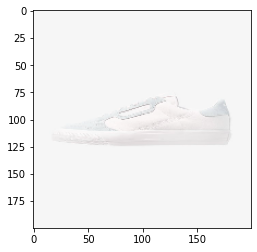

In [388]:
plt.imshow(trial_shoe)
plt.show()

In [284]:
IMG_SIZE = 200
trial_shoe = cv2.resize(trial_shoe, (IMG_SIZE, IMG_SIZE))

In [285]:
trial_shoe.shape

(200, 200, 3)

In [303]:
trial_pred = new_model.predict(trial_shoe.reshape((1, 200, 200, 3)))

In [304]:
trial_pred

array([[0.00022224]], dtype=float32)

In [313]:
def lets_take_a_picture():
    # initialize the camera
    cam = VideoCapture(0)   # 0 -> index of camera
    s, img = cam.read()
    if s:    # frame captured without any errors
        namedWindow("camera")
        imshow("camera",img)
        waitKey(0)
        imwrite("sneakers pic.jpg",img) #save image
        destroyWindow("camera")
        cam.release()
        cv2.destroyAllWindows()

In [314]:
def shoe():
    img_array = cv2.imread(os.path.join('sneakers pic.jpg'))
    IMG_SIZE = 200
    demo_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(demo_array)
    plt.show()

In [399]:
def recommend_me_some_shoes():
    new_model = keras.models.load_model('model8658.h5')
    new_array = np.array(demo_array)
    new_array = new_array.reshape((1, 200, 200, 3))
    prediction = new_model.predict(new_array)
    print('You might also like these shoes! \n')
    if np.round(prediction) == 0:
        trial_shoe = sneakers[sneakers["brand"]=="nike"]["image"].sample(1)
        trial_shoe = np.array(trial_shoe)
        trial_shoe = np.array(trial_shoe[0])
        plt.imshow(trial_shoe)
        plt.show()
        trial_shoe = sneakers[sneakers["brand"]=="nike"]["image"].sample(1)
        trial_shoe = np.array(trial_shoe)
        trial_shoe = np.array(trial_shoe[0])
        plt.imshow(trial_shoe)
        plt.show()
        trial_shoe = sneakers[sneakers["brand"]=="nike"]["image"].sample(1)
        trial_shoe = np.array(trial_shoe)
        trial_shoe = np.array(trial_shoe[0])
        plt.imshow(trial_shoe)
        plt.show()
    elif np.round(prediction) == 1:
        trial_shoe = sneakers[sneakers["brand"]=="adidas"]["image"].sample(1)
        trial_shoe = np.array(trial_shoe)
        trial_shoe = np.array(trial_shoe[0])
        plt.imshow(trial_shoe)
        plt.axis('off')
        plt.show()
        trial_shoe = sneakers[sneakers["brand"]=="adidas"]["image"].sample(1)
        trial_shoe = np.array(trial_shoe)
        trial_shoe = np.array(trial_shoe[0])
        plt.imshow(trial_shoe)
        plt.axis('off')
        plt.show()
        trial_shoe = sneakers[sneakers["brand"]=="adidas"]["image"].sample(1)
        trial_shoe = np.array(trial_shoe)
        trial_shoe = np.array(trial_shoe[0])
        plt.imshow(trial_shoe)
        plt.axis('off')
        plt.show()

In [330]:
def lets_go_shopping():
    if np.round(prediction) == 0:
        webbrowser.open('https://www.zalando.co.uk/men/?q=nike+shoes')
    elif np.round(prediction) == 1:
        webbrowser.open('https://www.zalando.co.uk/men/?q=adidas+shoes')

In [439]:
lets_take_a_picture()

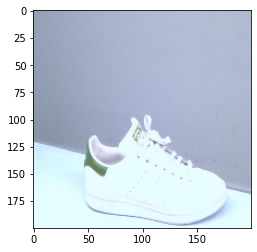

In [440]:
shoe()

You might also like these shoes! 



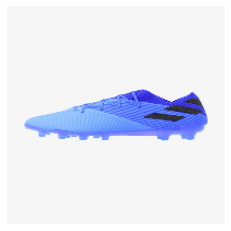

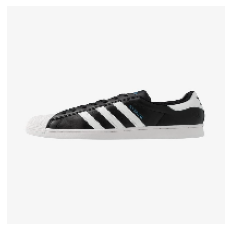

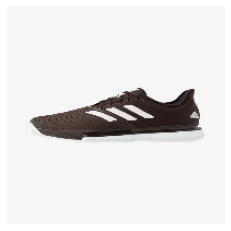

In [441]:
recommend_me_some_shoes()

In [442]:
lets_go_shopping()